<a href="https://colab.research.google.com/github/AntonioCrispim/mathematics-physics-codes/blob/main/NVcenters_magnonscavity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Latex installation

In [ ]:
! sudo apt-get install texlive-latex-recommended

In [ ]:
! sudo apt install texlive-latex-extra

In [ ]:
! sudo apt install dvipng

In [ ]:
pip install latex

In [ ]:
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng

##NV centers in a cavity 

The hamiltonian of NV center interacting with magnetic and eletric field is

\begin{eqnarray}
H_1 = (D+d_{\parallel})(J_z^2-2/3)+\gamma/(2\pi)\vec{B}\cdot\vec{J}+d_{\perp}E_x(J_y^2-J_z^2)+d_{\perp}E_y(J_xJ_y+J_yJ_x)+d'E_x(J_xJ_z+J_zJ_x)+d'E_y(J_yJ_z+J_zJ_y).
\end{eqnarray}

If we model the NV centers interacting with a cavity of magnons the total hamiltonian is

$$H=H_1 + \omega_m a^{\dagger}a+\lambda(a+a^{\dagger})(J^{-}+J^{+}),$$

where the second term is the bosonic modes of magnons and the third the interaction of collective spins of NV centers and the cavity.

The equation of evolution of the system can be described as

\begin{eqnarray}
\dot{\rho} &=&-i\lbrack H,\rho \rbrack
+\frac{\delta}{2}\mathcal{L}_{a}[\rho]+\frac{\delta}{2}\mathcal{L}_{a^{\dagger}}[\rho],
\end{eqnarray}

with $$\mathcal{L}_{A} = 2A\rho A^\dagger - A^\dagger A \rho - \rho A^\dagger A.$$



## Modules importation

In [ ]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import rc
from numpy import *
import numpy as np

In [ ]:
pip install qutip

     |████████████████████████████████| 14.6 MB 4.5 MB/s 


In [ ]:
from qutip import *

## Variables and preparation of operators

In [ ]:
DD = 0; #2.87
gamma2pi = 1;
dpara = 0; #0.0032;
dper = 0; #0.17 ;
dprime = 0.5*dper; 
delta = 1.0;
Bx=0;
By=0;
Bz=1;
Ex=0;
Ey=0;
Ez=0;
lamb=1.0;
omega=1.0;

In [ ]:
M = 4 
N = 1
#j = N/2
j = N
n = int(2*j + 1)

a  = tensor(destroy(M), qeye(n))
Jp = tensor(qeye(M), jmat(j, '+'))
Jm = tensor(qeye(M), jmat(j, '-'))
Jx = tensor(qeye(M), jmat(j, 'x'))
Jy = tensor(qeye(M), jmat(j, 'y'))
Jz = tensor(qeye(M), jmat(j, 'z'))

## Hamiltonian

NV center hamiltonian

In [ ]:
H1=(DD+dpara)*(Jz*Jz-2/3)+ gamma2pi*(Bx*Jx+By*Jy+Bz*Jz)+dper*Ex*(Jy*Jy-Jz*Jz)+dper*Ey*(Jx*Jy+Jy*Jx)+dprime*Ex*(Jx*Jz+Jz*Jx)+dprime*Ey*(Jy*Jz+Jz*Jy);

Magnons cavity interactions

In [ ]:
H2=a.dag()*a
H3=(a+a.dag())*(Jm+Jp)
#H4=(a*Jp+a.dag()*Jm)

H=H1+omega*H2+lamb*H3
#H=H1+omega*H2+lamb*H4
c_ops=[a]

In [ ]:
print(a)
print(jmat(j, 'z'))
print(Jz)

In [ ]:
print(a)
print(Jz.eigenstates())


In [ ]:
print(H1.eigenstates())

In [ ]:
print(tensor(Jz,Jz))
print(Jz*Jz)

In [ ]:
print(e)

##Steady State

In [ ]:
liouv=liouvillian(H, c_ops)
rho_ss = steadystate(liouv, method="direct")

In [ ]:
nx = 1000
xvec = np.linspace(-6, 6, nx)
W = wigner(rho_ss, xvec, xvec)

In [ ]:
rc('text', usetex=True)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


label_size = 25
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

# 1
Wp = np.round(W,3)
wmap = wigner_cmap(Wp)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(0, Wp.max())


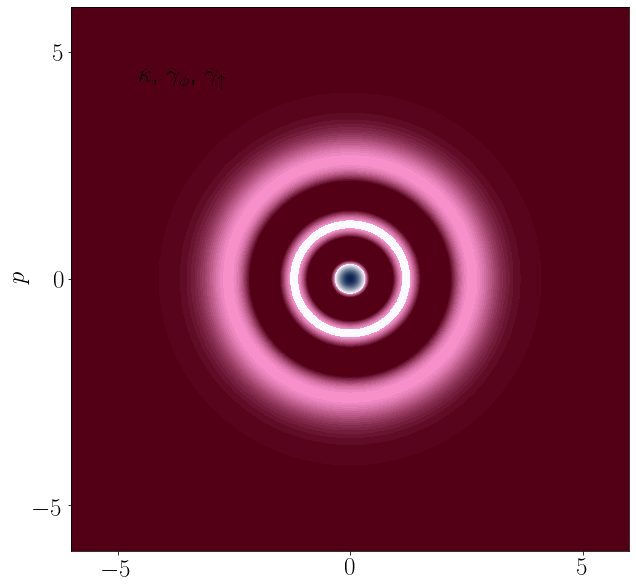

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

axes.contourf(xvec, xvec, Wp, 100, cmap=wmap, norm=nrm)
axes.set_title(r"$\kappa$, $\gamma_\phi$, $\gamma_\uparrow$", 
                     fontsize = label_size, position=(0.2, 0.85))

axes.set_xticks([-5,0,5])
axes.set_yticks([-5,0,5])
axes.set_ylabel(r'$p$', fontsize = label_size)

plt.show()
plt.close()

## Interaction strength

In [ ]:
g_vec = np.linspace(0.01, 1, 60)

# Ground state for the Hamiltonian: H = H1 + omega * H2 + lamb * H3
psi_gnd_list = [(H1 + omega*H2 + lamb*H3).groundstate()[1] for lamb in g_vec ]
#psi_gnd_list1 = [(H1 + omega*H2 + lamb*H3).eigenstates()[0] for lamb in g_vec ]
#psi_gnd_list = [(H1 + omega*H2 + lamb*H4).groundstate()[1] for lamb in g_vec ]

In [ ]:
#print(g_vec)
#print(psi_gnd_list)
print(psi_gnd_list1[0])

[-1.00010002 -0.01429259  0.01399256  0.97535528  0.99990001  1.02434477
  1.96835074  2.00006     2.03158925  2.97575564  3.02474431  4.00030004]


In [ ]:
n_gnd_vec = expect(a.dag(), psi_gnd_list)  
Jz_gnd_vec = expect(Jz, psi_gnd_list) 
Jx_gnd_vec = expect(Jp, psi_gnd_list) 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:2817: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


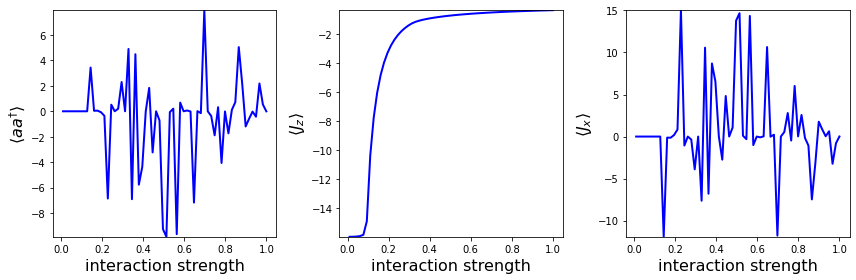

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12,4))

axes[0].plot(g_vec, n_gnd_vec, 'b', linewidth=2, label="cavity occupation")
axes[0].set_ylim(min(n_gnd_vec), max(n_gnd_vec))
axes[0].set_ylabel(r"$\langle aa^{\dagger}\rangle$", fontsize=16)
axes[0].set_xlabel("interaction strength", fontsize=16)

axes[1].plot(g_vec, Jz_gnd_vec, 'b', linewidth=2, label="cavity occupation")
axes[1].set_ylim(min(Jz_gnd_vec), max(Jz_gnd_vec))
axes[1].set_ylabel(r"$\langle J_z\rangle$", fontsize=16)
axes[1].set_xlabel("interaction strength", fontsize=16)

axes[2].plot(g_vec, Jx_gnd_vec, 'b', linewidth=2, label="cavity occupation")
axes[2].set_ylim(min(Jx_gnd_vec), max(Jx_gnd_vec))
axes[2].set_ylabel(r"$\langle J_x\rangle$", fontsize=16)
axes[2].set_xlabel("interaction strength", fontsize=16)

fig.tight_layout()

In [ ]:
n_gnd_vec = expect(a/sqrt(N), psi_gnd_list1)  
Jz_gnd_vec = expect(Jz, psi_gnd_list1) 
Jx_gnd_vec = expect(Jx, psi_gnd_list1) 

## Dynamics

In [ ]:
psi=tensor(basis(4,0),basis(3,0))
#print(psi)

In [ ]:
t=np.linspace(0.0,10,800)
result=mesolve(H,psi,t,[sqrt(0.25*delta)*a],[a.dag()*a,Jz,Jp*Jm]) 
#result=mesolve(H,psi,t,[],[a.dag()*a,Jz,Jp*Jm]) 
t=result.times
E0=transpose(result.expect[0])
E1=transpose(result.expect[1])
E2=transpose(result.expect[2])

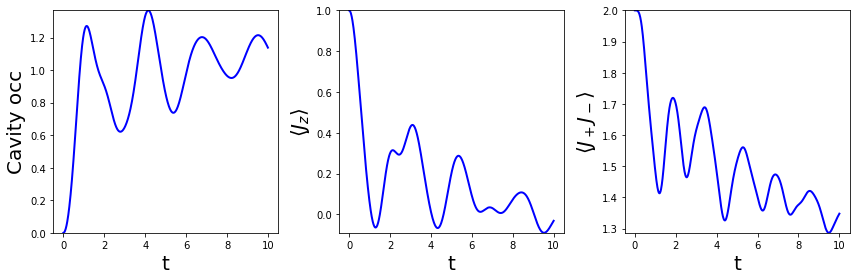

In [ ]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12,4))

axes[0].plot(t, E0, 'b', linewidth=2, label="emission")
axes[0].set_ylim(0, max(E0))
axes[0].set_ylabel("Cavity occ", fontsize=20)
axes[0].set_xlabel("t", fontsize=20)

axes[1].plot(t, E1, 'b', linewidth=2, label="emission")
axes[1].set_ylim(min(E1),max(E1))
axes[1].set_ylabel(r"$\langle J_z\rangle$", fontsize=20)
axes[1].set_xlabel("t", fontsize=20)

axes[2].plot(t, E2, 'b', linewidth=2, label="emission")
axes[2].set_ylim(min(E2),max(E2))
axes[2].set_ylabel(r"$\langle J_+J_-\rangle$", fontsize=20)
axes[2].set_xlabel("t", fontsize=20)

fig.tight_layout()
plt.savefig('image.jpg')

In [ ]:
print(y)

In [ ]:
Y    = fft.fft(E0)
w = fft.fftfreq(len(E0), t[1] - t[0])

In [ ]:
plt.plot(w,Y)

In [ ]:
#print(Y)
#print(Y)

print(w[argmin(Y)])




##Jaynes-cummings model  $(J=1/2)$



Initial state $|0>_c \otimes |1>_a $ where $|0>_c=(1,0,0,0,0,0,0,0) $ e $|1>_a=(1,0)$ and $J=1/2, m=1/2$ 


Parameters | value 
:-----:|:-----:
$D$ | 0.0 | 
$\gamma/(2\pi)$ | 1.0 | 
$d_{\parallel}$| 0.0 | 
$d_{\perp}$ | 0.0 |  
$d'$ | 0.5$d_{perp}$|
$δ$ | 0,0 |
$B_x$ | 0.0 |
$B_y$ | 0.0 |
$B_z$ | 1.0 |
$E_x$ | 0.0 |
$E_y$ | 0.0 |
$E_z$ | 0.0 |
$λ$ | 1.0 |
$ω$ | 1.0 |


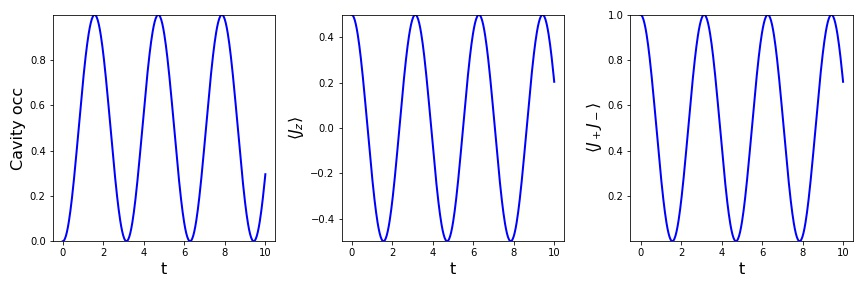

##Jaynes-cummings model  $(J=1)$

Initial state $|0>_c \otimes |1>_a $ where $|0>_c=(1,0,0,0,0,0,0,0) $ e $|1>_a=(1,0,0)$ and $J=1, m=1$ 


Parameters | value 
:-----:|:-----:
$D$ | 0.0 | 
$\gamma/(2\pi)$ | 1.0 | 
$d_{\parallel}$| 0.0 | 
$d_{\perp}$ | 0.0 |  
$d'$ | 0.5$d_{perp}$|
$δ$ | 0,0 |
$B_x$ | 0.0 |
$B_y$ | 0.0 |
$B_z$ | 1.0 |
$E_x$ | 0.0 |
$E_y$ | 0.0 |
$E_z$ | 0.0 |
$λ$ | 1.0 |
$ω$ | 1.0 |


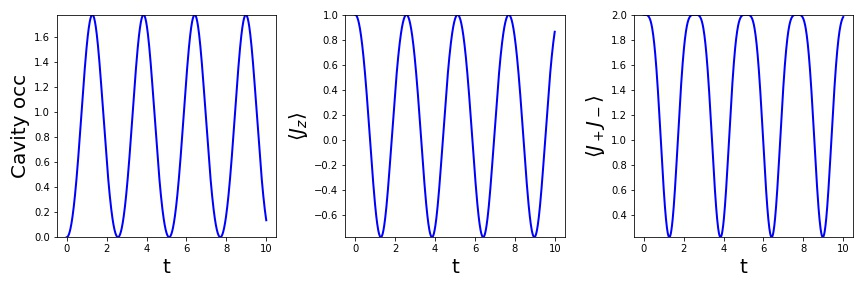

## Rabi model $(J=1/2)$



Initial state $|0>_c \otimes |1>_a $ where $|0>_c=(1,0) (M=2)$ e $|1>_a=(1,0) (N=1)$ and $J=1/2, m=1/2$ 


Parameters | value 
:-----:|:-----:
$D$ | 0.0 | 
$\gamma/(2\pi)$ | 1.0 | 
$d_{\parallel}$| 0.0 | 
$d_{\perp}$ | 0.0 |  
$d'$ | 0.5$d_{perp}$|
$δ$ | 0.5 |
$B_x$ | 0.0 |
$B_y$ | 0.0 |
$B_z$ | 1.0 |
$E_x$ | 0.0 |
$E_y$ | 0.0 |
$E_z$ | 0.0 |
$λ$ | 1.0 |
$ω$ | 1.0 |


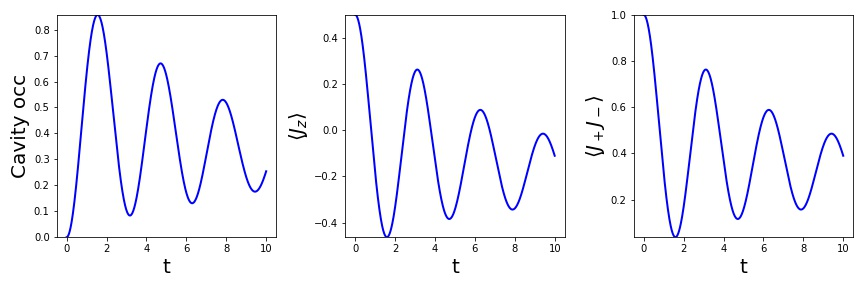

## Rabi model $(J=1)$

Initial state $|0>_c \otimes |1>_a $ where $|0>_c=(1,0) (M=2)$ e $|1>_a=(1,0) (N=1)$ and $J=1, m=1$ 


Parameters | value 
:-----:|:-----:
$D$ | 0.0 | 
$\gamma/(2\pi)$ | 1.0 | 
$d_{\parallel}$| 0.0 | 
$d_{\perp}$ | 0.0 |  
$d'$ | 0.5$d_{perp}$|
$δ$ | 0.5 |
$B_x$ | 0.0 |
$B_y$ | 0.0 |
$B_z$ | 1.0 |
$E_x$ | 0.0 |
$E_y$ | 0.0 |
$E_z$ | 0.0 |
$λ$ | 1.0 |
$ω$ | 1.0 |


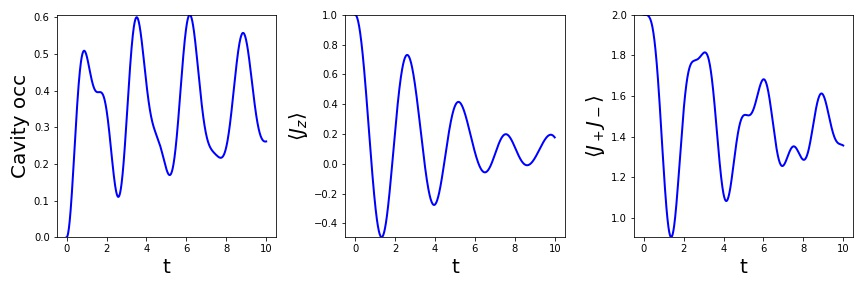